# DATA260P Project 2: Bin Packing Algorithms

#### Connor McManigal and Aaron Mui

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

/var/folders/3m/d7f4z91511998gqg0bmhsy_00000gn/T/ipykernel_4907/2657863069.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("binpacking_results.csv")

# Alter algorithm naming convention
def format_string(string_value):
    parts = string_value.strip("()").replace("'", "").split(", ")
    return parts[0] + parts[1]

df['Algorithm'] = df['Algos'].apply(format_string)
df2 = df.drop('Algos', axis=1)

# Function for plotting
def plottype(df, algo, type, axes, inits=5):
    for i in range(inits):
        df_f = df[df['Algorithm'] == f'{algo}{i}']
        axes.plot(np.log(df_f['Data Size']), np.log(df_f[type]), label=f'Run {i + 1}')
    axes.legend()
    axes.grid()    
    axes.set_xticks(np.log(df_f['Data Size']))
    axes.set_title(f'{algo} {type}')
    axes.set_xlabel('Log Data Size')
    axes.set_ylabel(f'Log {type}')

## NextFit

#### Descriptive Statistics

In [3]:
nextfit = df2[df2['Algorithm'].str.contains('NextFit0|NextFit1|NextFit2|NextFit3|NextFit4')]
mean_nf = nextfit.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
mean_nf = mean_nf.rename(columns={'Runtime': 'Mean Runtime','Waste': 'Mean Waste'})
print(mean_nf)

            Mean Waste  Mean Runtime
Data Size                           
100          14.229911      0.000024
200          28.558679      0.000043
400          56.627807      0.000083
800         115.816490      0.000176
1600        233.217887      0.000394
3200        458.747150      0.000718
6400        928.486310      0.001579
12800      1842.777196      0.003148
25600      3691.390597      0.006346


#### Plotting Waste and Runtime on Log-Log Scale

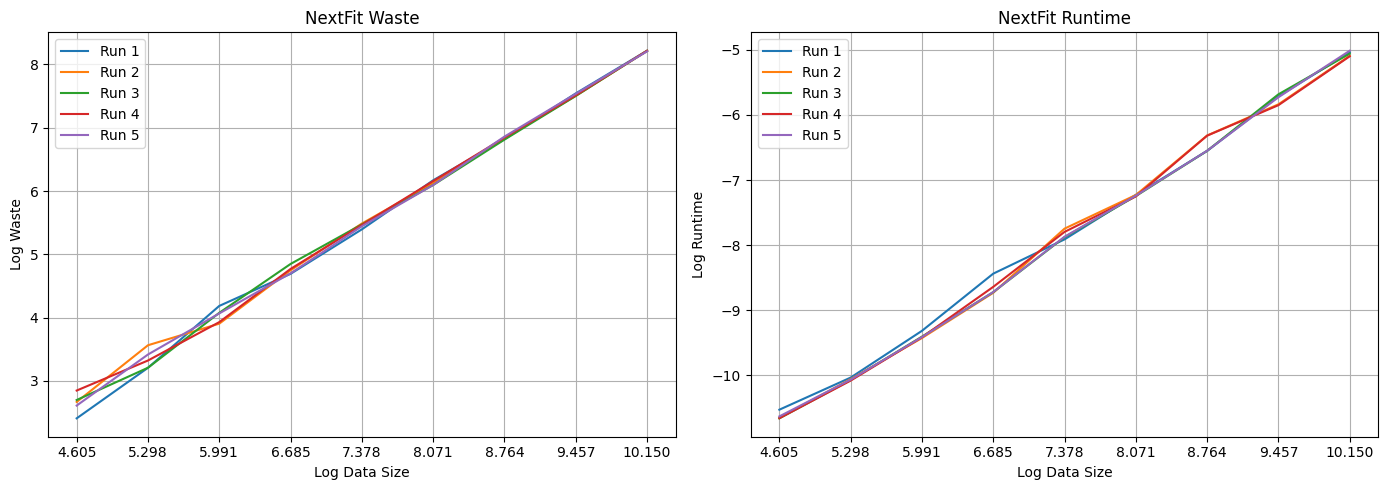

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plottype(df2, 'NextFit', 'Waste', axes[0])
plottype(df2, 'NextFit', 'Runtime', axes[1])
plt.tight_layout()
plt.show()

In [7]:
data_sizes = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600])
nf_waste = np.array([14.229911, 28.558679, 56.627807, 115.816490, 233.217887, 458.747150, 928.486310, 1842.777196, 3691.390597])
log_data_sizes = np.log(data_sizes)
log_nf_waste = np.log(nf_waste)
X = sm.add_constant(log_data_sizes)

model_nf = sm.OLS(log_nf_waste, X).fit()
print('Waste Coefficients')
print("Coefficients for NF:", model_nf.params)

Waste Coefficients
Coefficients for NF: [-1.96037817  1.00280427]


In [16]:
logmean_nf_time=np.log(np.asarray(mean_nf['Mean Runtime']))
model_nf_time=sm.OLS(logmean_nf_time, X).fit()
print('Runtime Coefficients')
print(f'Coefficients for NF: {model_nf_time.params}')

Runtime Coefficients
Coefficients for NF: [-15.42815427   1.02076405]


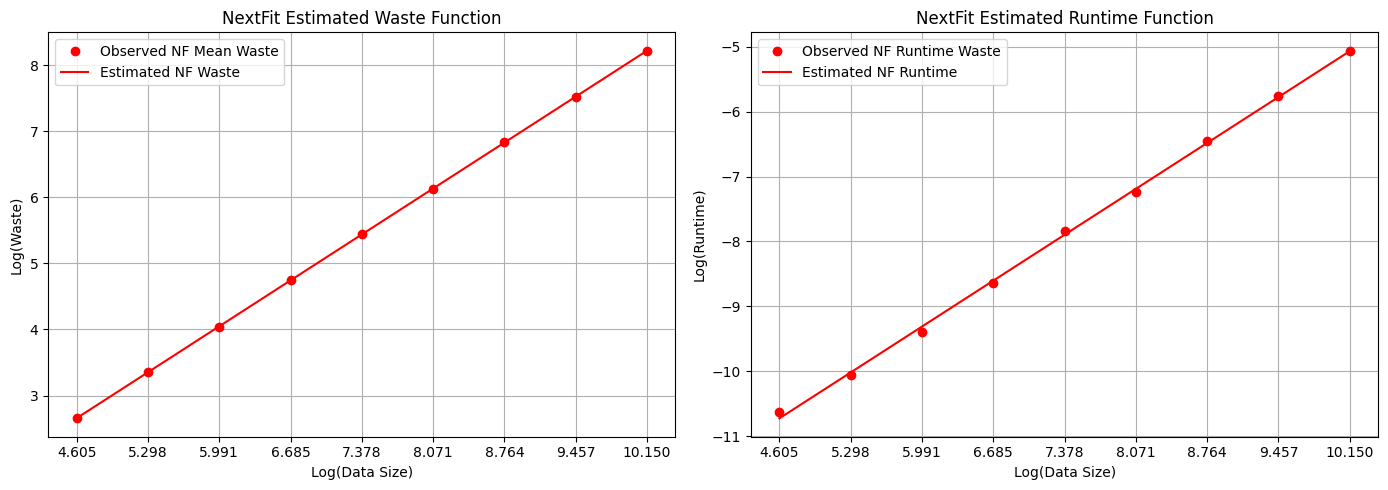

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# plt.figure(figsize=(6, 3))
axes[0].plot(log_data_sizes, log_nf_waste, 'ro', label = 'Observed NF Mean Waste')
axes[0].plot(log_data_sizes, model_nf.fittedvalues, 'r-', label = 'Estimated NF Waste')
axes[0].set_xlabel('Log(Data Size)')
axes[0].set_ylabel('Log(Waste)')
axes[0].set_xticks(log_data_sizes)
axes[0].legend()
axes[0].set_title('NextFit Estimated Waste Function')
axes[0].grid()

axes[1].plot(log_data_sizes, logmean_nf_time, 'ro', label = 'Observed NF Runtime Waste')
axes[1].plot(log_data_sizes, model_nf_time.fittedvalues, 'r-', label = 'Estimated NF Runtime')
axes[1].set_xlabel('Log(Data Size)')
axes[1].set_ylabel('Log(Runtime)')
axes[1].set_xticks(log_data_sizes)
axes[1].legend()
axes[1].set_title('NextFit Estimated Runtime Function')
axes[1].grid()


plt.tight_layout()
plt.show()

#### NextFit Results Diagnosis

**NF Estimated Waste Function of n**: 
- $Log(NFWaste) = -1.9604 + 1.0028 log(n)$
- OR exponentiated: $NFWaste = 0.140 n^{1.0028}$

**Estimated Big-O Runtime**:

Since we are in the log-log scale, we will use the slope of the mean runtime as the basis for our estimate. If the slope is approximately 0.5, we estimate that the big-O is $O(n^{0.5})$. In general for a linear line in the log-log scale. If we observe a slope of k, our estimated big-O is $O(n^{k})$. Since our slope estimate is approximately 1.0207, our big-O estimate for NextFit is $O(n)$.

**Results**:

Since NextFit follows the simplest bin packing strategy, it makes sense that the runtimes are fast and the waste performances are mediocre. Across the five trials, NextFit performed with lightning fast speed, only taking a few milliseconds to run across all data sizes and waste stayed relatively consistent. This simplicity and efficiency comes at the cost of poor waste performance. NextFit's estimated waste function almost perfectly predicts the observed mean waste across the varying dataset sizes. It should be noted that the estimated waste function's slope of 1.0028 is the highest across all of the other algorithms, thus confirming its poor waste generation. As expected, NextFit is our fastest performing bin packing algorithm but our worst performer in terms of waste.

## FirstFit

#### Descriptive Statistics

In [17]:
firstfit = df2[df2['Algorithm'].str.contains('FirstFit0|FirstFit1|FirstFit2|FirstFit3|FirstFit4')]
mean_ff = firstfit.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
mean_ff = mean_ff.rename(columns={'Runtime': 'Mean Runtime','Waste': 'Mean Waste'})
print(mean_ff)

           Mean Waste  Mean Runtime
Data Size                          
100          4.429911      0.000118
200          6.758679      0.000369
400          8.427807      0.001352
800         14.016490      0.005294
1600        20.817887      0.021371
3200        36.147150      0.089400
6400        59.486310      0.365422
12800      109.577196      1.474273
25600      209.190597      5.883045


#### Plotting Waste and Runtime on Log-Log Scale

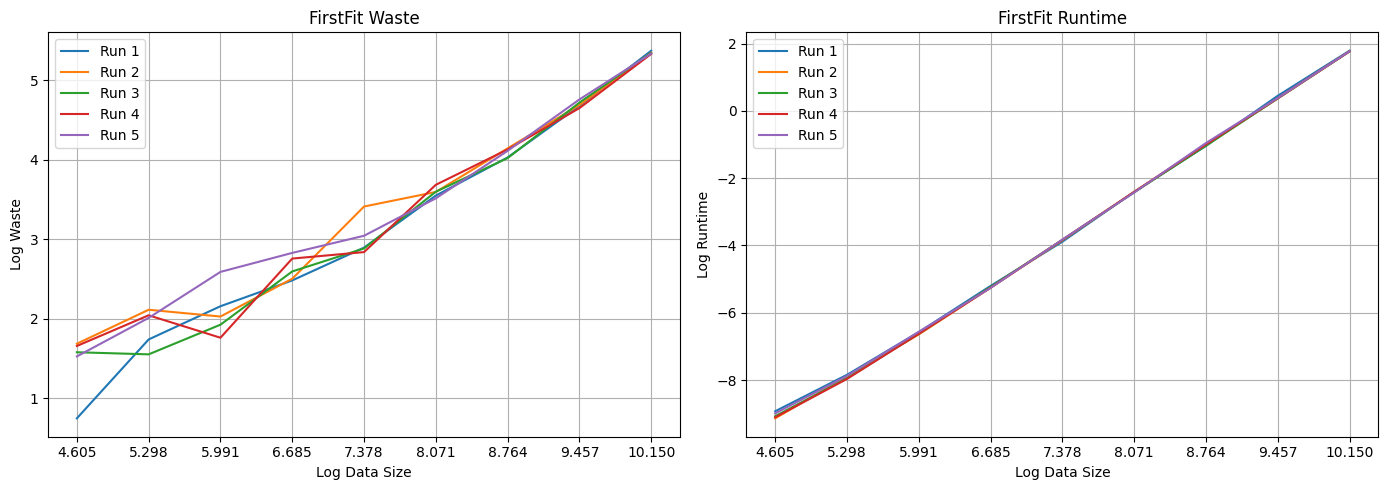

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plottype(df2, 'FirstFit', 'Waste', axes[0])
plottype(df2, 'FirstFit', 'Runtime', axes[1])
plt.tight_layout()
plt.show()

In [19]:
data_sizes = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600])
ff_waste = np.array([4.429911, 6.758679, 8.427807, 14.016490, 20.817887, 36.147150, 59.486310, 109.577196, 209.190597])
log_data_sizes = np.log(data_sizes)
log_ff_waste = np.log(ff_waste)
X = sm.add_constant(log_data_sizes)

model_ff = sm.OLS(log_ff_waste, X).fit()
print('Waste Coefficients')
print("Coefficients for FF:", model_ff.params)

Waste Coefficients
Coefficients for FF: [-1.86602966  0.68846979]


In [21]:
logmean_ff_time=np.log(np.asarray(mean_ff['Mean Runtime']))
model_ff_time=sm.OLS(logmean_ff_time, X).fit()
print('Runtime Coefficients')
print(f'Coefficients for FF: {model_ff_time.params}')

Runtime Coefficients
Coefficients for FF: [-18.34322619   1.97570555]


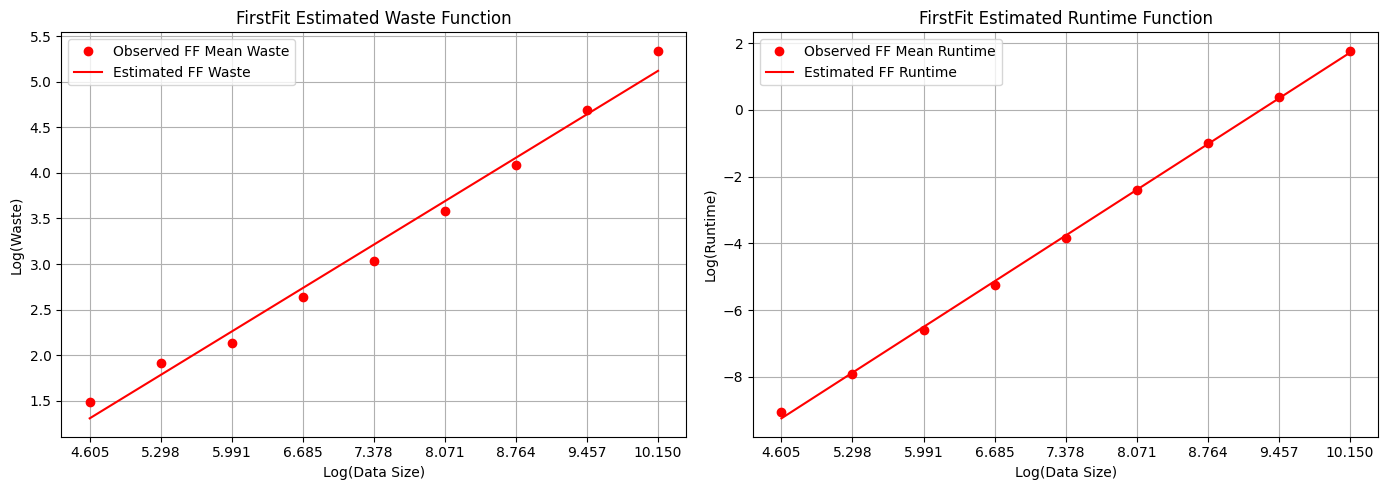

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(log_data_sizes, log_ff_waste, 'ro', label = 'Observed FF Mean Waste')
axes[0].plot(log_data_sizes, model_ff.fittedvalues, 'r-', label = 'Estimated FF Waste')
axes[0].set_xlabel('Log(Data Size)')
axes[0].set_ylabel('Log(Waste)')
axes[0].set_xticks(log_data_sizes)
axes[0].legend()
axes[0].set_title('FirstFit Estimated Waste Function')
axes[0].grid()

axes[1].plot(log_data_sizes, logmean_ff_time, 'ro', label = 'Observed FF Mean Runtime')
axes[1].plot(log_data_sizes, model_ff_time.fittedvalues, 'r-', label = 'Estimated FF Runtime')
axes[1].set_xlabel('Log(Data Size)')
axes[1].set_ylabel('Log(Runtime)')
axes[1].set_xticks(log_data_sizes)
axes[1].legend()
axes[1].set_title('FirstFit Estimated Runtime Function')
axes[1].grid()


plt.tight_layout()
plt.show()

#### FirstFit Results Diagnosis

**Estimated Waste Function of n**: 
- $Log(FFWaste) = -1.866 + 0.6884 log(n)$
- OR exponentiated: $FFWaste = 0.1547 n^{0.6884}$

**Estimated Big-O Runtime**:

Because the slope for our estimated runtime is approximately 2. Our estimated big-O is $O(n^{2})$.

**Results**:

FirstFit performed reasonably well in terms of both runtime and waste generation. As expected with a more complicated bin packing strategy, waste would be substantially better but the cost would be slower runtimes. Across the five trials, waste performance fluctuated to some degree, but eventually converged as data sizes got larger. Runtimes stayed very similar across the trials, following a linear trend in the log-log plot. Compared to NextFit, smaller sized data ran almost as fast, but as data sizes increased runtimes got much larger(taking seconds versus milliseconds). While creating the waste equation for FirstFit in regard to data size n, we see a small slope of 0.64884, which indicates the significant waste improvements made when compared to NextFit's slope of 1.0028. Although the estimated waste function does not perfectly predict the observed mean waste performances, the estimated model does a sufficient job at modeling its relationship. Relative to the other algorithms, FirstFit possesses some degree of balance between satisfactory waste generation and decent runtimes.

## BestFit

#### Descriptive Statistics

In [25]:
bestfit = df2[df2['Algorithm'].str.contains('BestFit0|BestFit1|BestFit2|BestFit3|BestFit4')]
mean_bf = bestfit.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
mean_bf = mean_bf.rename(columns={'Runtime': 'Mean Runtime','Waste': 'Mean Waste'})
print(mean_bf)

           Mean Waste  Mean Runtime
Data Size                          
100          3.629911      0.000338
200          4.558679      0.001171
400          6.427807      0.004331
800          9.216490      0.016818
1600        15.817887      0.067538
3200        25.747150      0.271404
6400        45.286310      1.083424
12800       80.377196      4.343436
25600      153.590597     17.311385


#### Plotting Waste and Runtime on Log-Log Scale

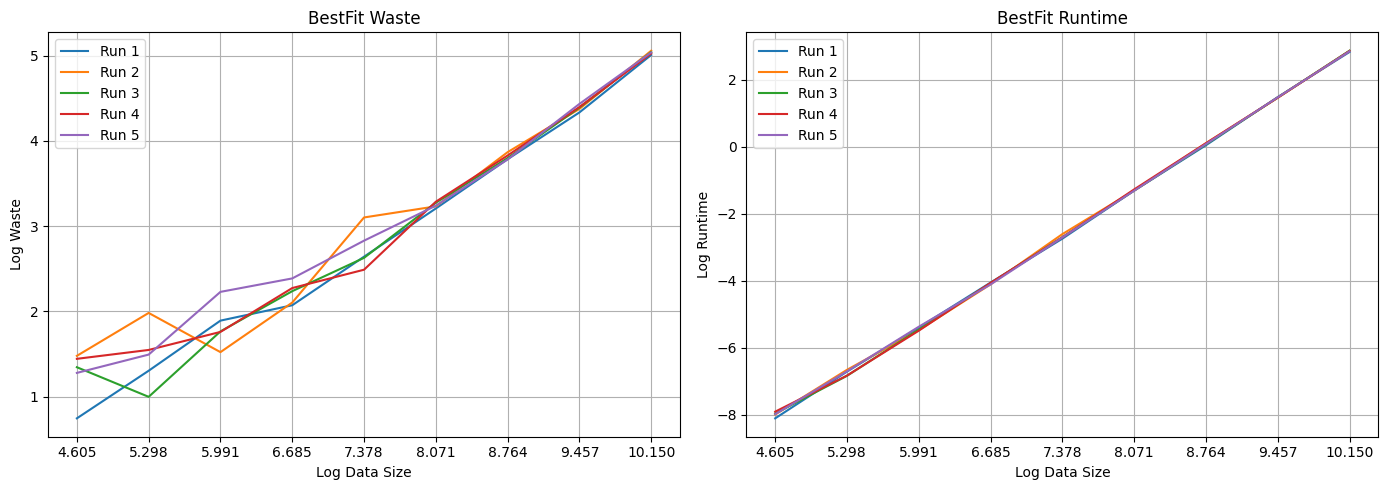

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plottype(df2, 'BestFit', 'Waste', axes[0])
plottype(df2, 'BestFit', 'Runtime', axes[1])
plt.tight_layout()
plt.show()

In [27]:
data_sizes = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600])
bf_waste = np.array([3.629911, 4.558679, 6.427807, 9.216490, 15.817887, 25.747150, 45.286310, 80.377196, 153.590597])
log_data_sizes = np.log(data_sizes)
log_bf_waste = np.log(bf_waste)
X = sm.add_constant(log_data_sizes)

model_bf = sm.OLS(log_bf_waste, X).fit()
print('Waste Coefficients')
print("Coefficients for BF:", model_bf.params)

Waste Coefficients
Coefficients for BF: [-2.15616044  0.68579699]


In [29]:
logmean_bf_time=np.log(np.asarray(mean_bf['Mean Runtime']))
model_bf_time=sm.OLS(logmean_bf_time, X).fit()
print('Runtime Coefficients')
print(f'Coefficients for BF: {model_bf_time.params}')

Runtime Coefficients
Coefficients for BF: [-17.1737247    1.96829088]


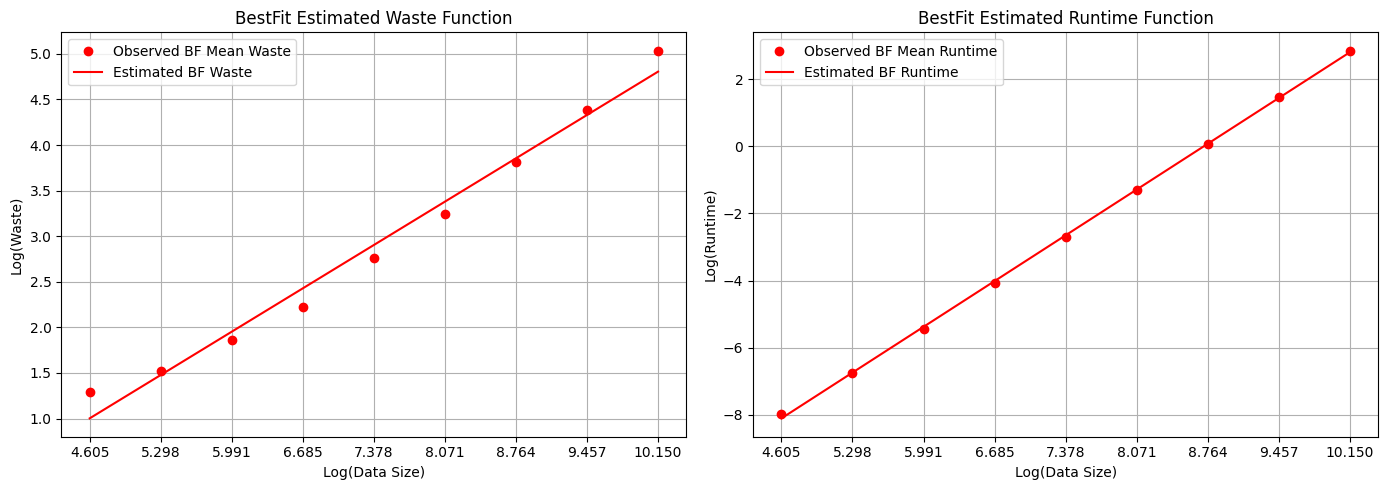

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(log_data_sizes, log_bf_waste, 'ro', label = 'Observed BF Mean Waste')
axes[0].plot(log_data_sizes, model_bf.fittedvalues, 'r-', label = 'Estimated BF Waste')
axes[0].set_xlabel('Log(Data Size)')
axes[0].set_ylabel('Log(Waste)')
axes[0].set_xticks(log_data_sizes)
axes[0].legend()
axes[0].set_title('BestFit Estimated Waste Function')
axes[0].grid()

axes[1].plot(log_data_sizes, logmean_bf_time, 'ro', label = 'Observed BF Mean Runtime')
axes[1].plot(log_data_sizes, model_bf_time.fittedvalues, 'r-', label = 'Estimated BF Runtime')
axes[1].set_xlabel('Log(Data Size)')
axes[1].set_ylabel('Log(Runtime)')
axes[1].set_xticks(log_data_sizes)
axes[1].legend()
axes[1].set_title('BestFit Estimated Runtime Function')
axes[1].grid()



plt.tight_layout()
plt.show()

#### BestFit Results Diagnosis

**Estimated Waste Function of n**: 
- $Log(BFWaste) = -2.156 + 0.68579 log(n)$
- OR exponentiated: $BFWaste = 0.11578 n^{0.68579}$

**Estimated Big-O Runtime**:

Because the slope for our estimated runtime is approximately 2. Our estimated big-O is $O(n^{2})$.

**Results**:

In respect to waste, BestFit performed better than FirstFit and NextFit, but as a part of the tradeoff, it had much longer runtimes. BestFit's slower runtimes are noticeably worse than FirstFit's and far worse than NextFit's. The estimated waste equations of BestFit and FirstFit have very similar slopes ~0.68, which goes to show somewhat similar waste performance, however, comparing across all data sizes, BestFit did perform better at each size. The estimated waste function also does a good job of accurately modeling the mean waste performances at each data size. Across the five trials, BestFit's observed waste values fluctuated to some degree until larger data sizes where they eventually converged. Similar to FF, BF's observed runtimes are strictly linear in the log-log scaled plot above. While BestFit provides adequate waste levels, even without sorting, its runtime performance suffers as a consequence.

## FirstFit Decreasing

#### Descriptive Statistics

In [37]:
firstfitdec = df2[df2['Algorithm'].str.contains('FirstFitDec0|FirstFitDec1|FirstFitDec2|FirstFitDec3|FirstFitDec4')]
mean_ffd = firstfitdec.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
mean_ffd = mean_ffd.rename(columns={'Runtime': 'Mean Runtime','Waste': 'Mean Waste'})
print(mean_ffd)

           Mean Waste  Mean Runtime
Data Size                          
100          2.229911      0.000255
200          1.558679      0.000715
400          1.027807      0.002281
800          1.016490      0.007938
1600         1.017887      0.029426
3200         1.547150      0.116396
6400         1.886310      0.455405
12800        1.977196      1.829690
25600        2.190597      7.432171


#### Plotting Waste and Runtime on Log-Log Scale

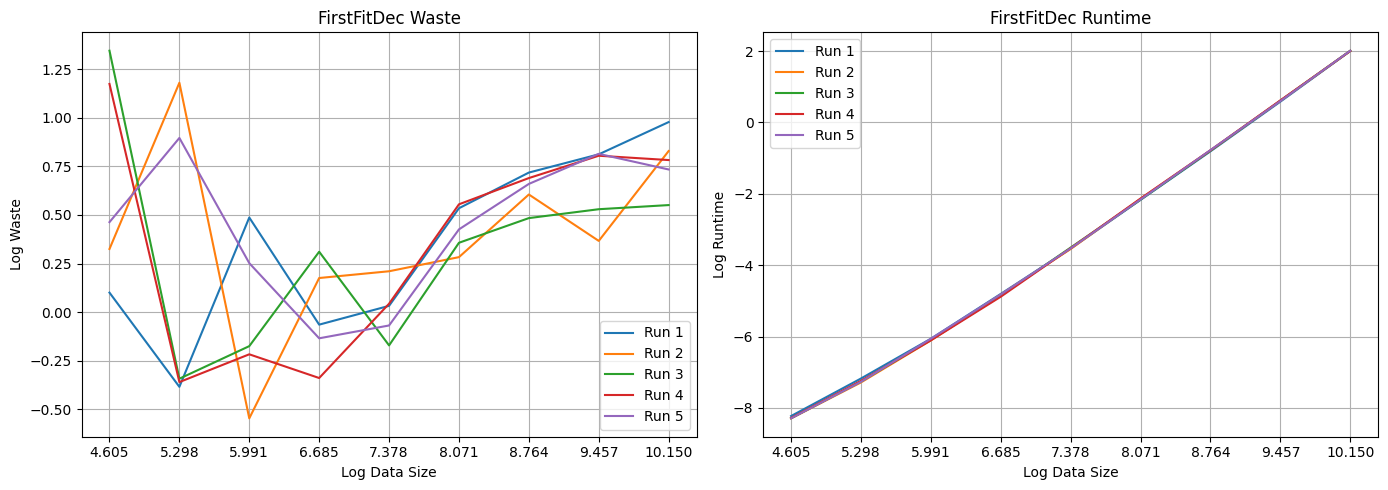

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plottype(df2, 'FirstFitDec', 'Waste', axes[0])
plottype(df2, 'FirstFitDec', 'Runtime', axes[1])
plt.tight_layout()
plt.show()

In [57]:
data_sizes = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600])
ffd_waste = np.asarray(mean_ffd['Mean Waste'])
truncated_data = data_sizes[3:]
truncated_waste = ffd_waste[3:]
log_data_sizes = np.log(data_sizes)
log_trunc_data = np.log(truncated_data)
log_ffd_waste = np.log(ffd_waste)
log_trunc_ffd_waste = np.log(truncated_waste)
X = sm.add_constant(log_data_sizes)
X_trunc = sm.add_constant(log_trunc_data)

model_ffd = sm.OLS(log_ffd_waste, X).fit()
trunc_model_ffd = sm.OLS(log_trunc_ffd_waste, X_trunc).fit()
print('Waste Coefficients')
print("Coefficients for FFD:", model_ffd.params)
print("Coefficients for FFD Truncated:", trunc_model_ffd.params)

Waste Coefficients
Coefficients for FFD: [0.02323063 0.05474605]
Coefficients for FFD Truncated: [-1.66342331  0.24852087]


In [44]:
logmean_ffd_time=np.log(np.asarray(mean_ffd['Mean Runtime']))
model_ffd_time=sm.OLS(logmean_ffd_time, X).fit()
print('Runtime Coefficients')
print(f'Coefficients for FFD: {model_ffd_time.params}')

Runtime Coefficients
Coefficients for FFD: [-17.19150316   1.87401637]


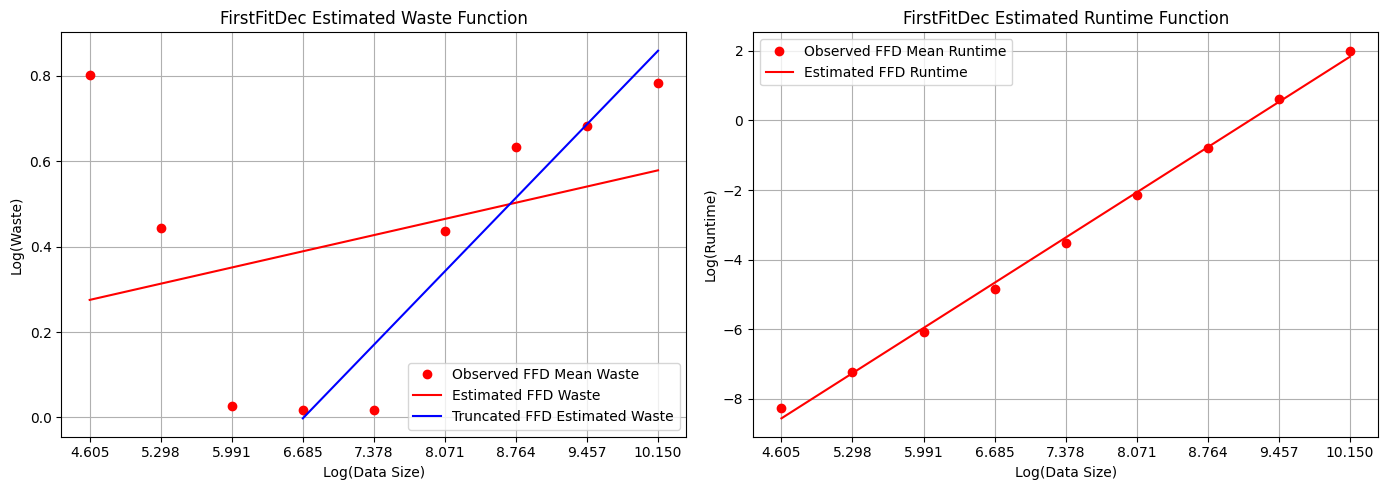

In [48]:
# plt.figure(figsize=(8, 3))
# plt.figure(figsize=(14, 5))
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(log_data_sizes, log_ffd_waste, 'ro', label = 'Observed FFD Mean Waste')
axes[0].plot(log_data_sizes, model_ffd.fittedvalues, 'r-', label = 'Estimated FFD Waste')
axes[0].plot(log_trunc_data, trunc_model_ffd.fittedvalues, 'b-', label = 'Truncated FFD Estimated Waste')
axes[0].set_xlabel('Log(Data Size)')
axes[0].set_ylabel('Log(Waste)')
axes[0].set_xticks(log_data_sizes)
axes[0].legend()
axes[0].set_title('FirstFitDec Estimated Waste Function')
axes[0].grid()

axes[1].plot(log_data_sizes, logmean_ffd_time, 'ro', label = 'Observed FFD Mean Runtime')
axes[1].plot(log_data_sizes, model_ffd_time.fittedvalues, 'r-', label = 'Estimated FFD Runtime')
axes[1].set_xlabel('Log(Data Size)')
axes[1].set_ylabel('Log(Runtime)')
axes[1].set_xticks(log_data_sizes)
axes[1].legend()
axes[1].set_title('FirstFitDec Estimated Runtime Function')
axes[1].grid()

plt.tight_layout()
plt.show()

#### FirstFit Decreasing Results Diagnosis

**Full Estimated Waste Function of n**: 
- $Log(FFDWaste) = 0.0232 + 0.0547 log(n)$
- OR exponentiated: $FFDWaste = 1.023 n^{0.0547}$

**Truncated Estimated Waste Function of n**: 
- $Log(FFDWaste) = -1.6634 + 0.2485 log(n)$
- OR exponentiated: $FFDWaste = 0.18949 n^{0.2485}$


**Estimated Big-O Runtime**:

The slope of our estimated runtime is approximately 1.874. This means that our estimated big-O is $O(n^{1.874}) \approx O(n^{2})$.

**Results**:

FirstFitDecreasing out performs FirstFit, BestFit, and NextFit by large margins due to its sorting nature. Because it utilizes sorting, the packing order is much more efficient, thus reducing waste and number of bins. The waste slope is smaller than those binpacking algorithms as well. This means that as your data size increases, the waste increases at a slower rate. We have two models for our waste plot because during the first three runs, where n is relatively small, our waste is larger than that of the following. This does not follow the pattern of monotonically increasing waste as a function of n. This could be because of noisy data, as each input is more significant at lower n. For this reason, we fit two OLS models to the data, one using all the points, and the truncated version only taking point into account where the monotonically increasing waste kicks in.

From our log-log plot, the estimated big-O runtime is approximately $O(n{^2})$. We can calculate the theoretical run time by splitting up the steps. First, MergeSort is used which is $O(nlogn)$. After sorting, the binpacking is $O(n)$, all adding up to $O(nlogn)$. Our estimated big-O  is slightly less than quadratic, which is still an upperbound to the theoretical big-O of $O(nlogn)$.

## BestFit Decreasing

#### Descriptive Statistics

In [49]:
bestfitdec = df2[df2['Algorithm'].str.contains('BestFitDec0|BestFitDec1|BestFitDec2|BestFitDec3|BestFitDec4')]
mean_bfd = bestfitdec.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
mean_bfd = mean_bfd.rename(columns={'Runtime': 'Mean Runtime','Waste': 'Mean Waste'})
print(mean_bfd)

           Mean Waste  Mean Runtime
Data Size                          
100          2.229911      0.000568
200          1.558679      0.001883
400          0.827807      0.006641
800          1.016490      0.025631
1600         1.017887      0.100216
3200         1.547150      0.403246
6400         1.886310      1.615202
12800        1.977196      6.402005
25600        2.190597     25.428774


#### Plotting Waste and Runtime on Log-Log Scale

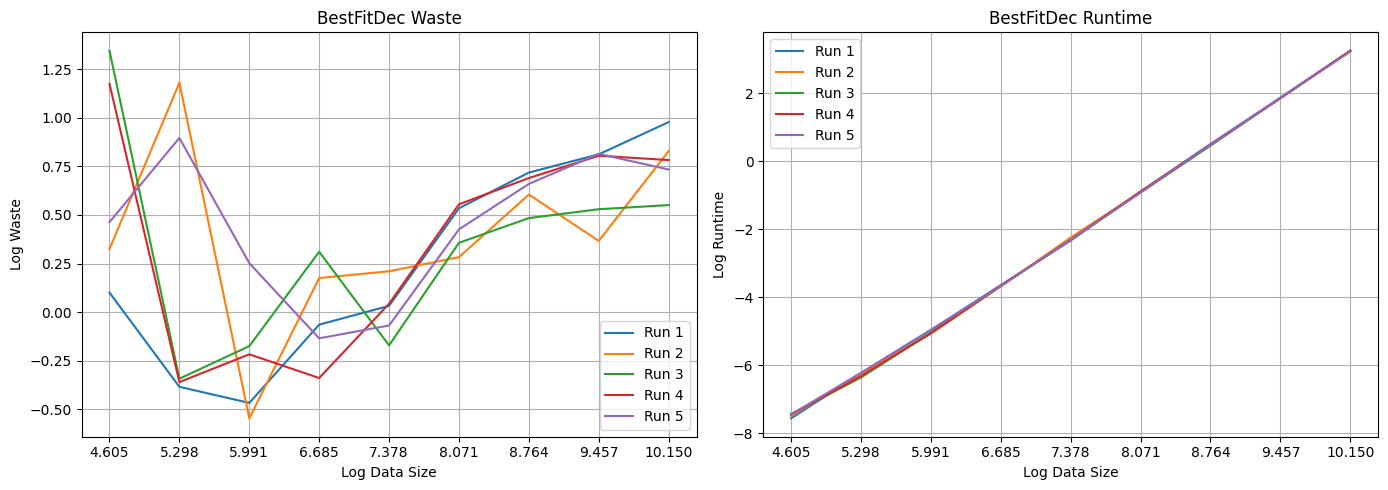

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plottype(df2, 'BestFitDec', 'Waste', axes[0])
plottype(df2, 'BestFitDec', 'Runtime', axes[1])
plt.tight_layout()
plt.show()

In [58]:
data_sizes = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600])
bfd_waste = np.asarray(mean_bfd['Mean Waste'])
truncated_data = data_sizes[3:]
truncated_waste = bfd_waste[3:]
log_data_sizes = np.log(data_sizes)
log_trunc_data = np.log(truncated_data)
log_bfd_waste = np.log(bfd_waste)
log_trunc_bfd_waste = np.log(truncated_waste)
X = sm.add_constant(log_data_sizes)
X_trunc = sm.add_constant(log_trunc_data)

model_bfd = sm.OLS(log_bfd_waste, X).fit()
trunc_model_bfd = sm.OLS(log_trunc_bfd_waste, X_trunc).fit()
print('Waste Coefficients')
print("Coefficients for BFD:", model_bfd.params)
print("Coefficients for BFD Truncated:", trunc_model_bfd.params)

Waste Coefficients
Coefficients for BFD: [-0.0775927   0.06515281]
Coefficients for BFD Truncated: [-1.66342331  0.24852087]


In [54]:
logmean_bfd_time=np.log(np.asarray(mean_bfd['Mean Runtime']))
model_bfd_time=sm.OLS(logmean_bfd_time, X).fit()
print('Runtime Coefficients')
print(f'Coefficients for BFD: {model_bfd_time.params}')

Runtime Coefficients
Coefficients for BFD: [-16.59470854   1.94711622]


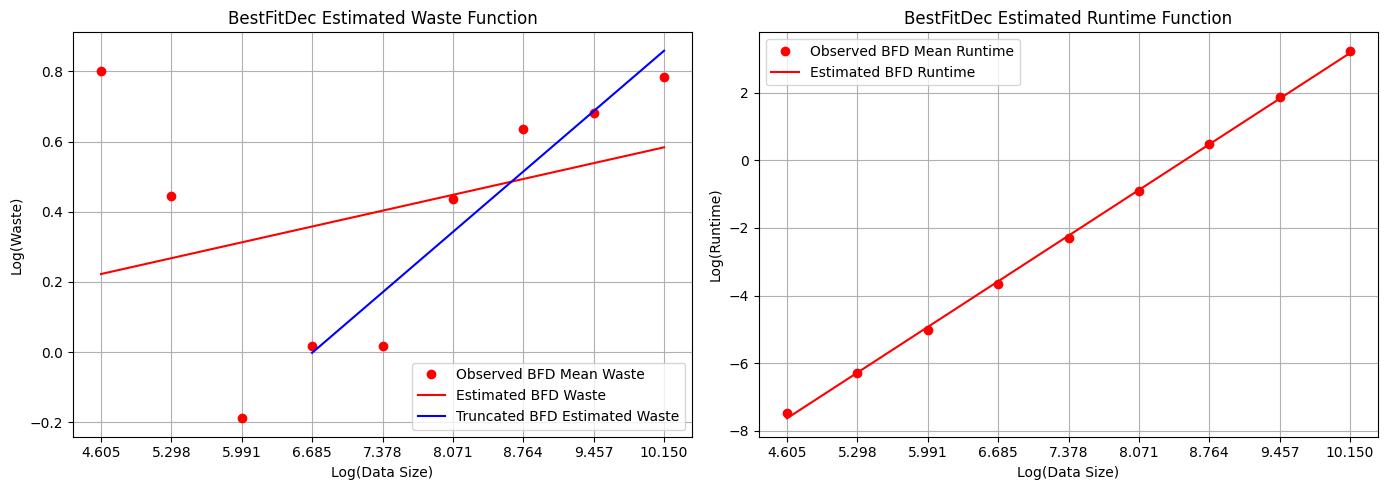

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(log_data_sizes, log_bfd_waste, 'ro', label = 'Observed BFD Mean Waste')
axes[0].plot(log_data_sizes, model_bfd.fittedvalues, 'r-', label = 'Estimated BFD Waste')
axes[0].plot(log_trunc_data, trunc_model_bfd.fittedvalues, 'b-', label = 'Truncated BFD Estimated Waste')
axes[0].set_xlabel('Log(Data Size)')
axes[0].set_ylabel('Log(Waste)')
axes[0].set_xticks(log_data_sizes)
axes[0].legend()
axes[0].set_title('BestFitDec Estimated Waste Function')
axes[0].grid()

axes[1].plot(log_data_sizes, logmean_bfd_time, 'ro', label = 'Observed BFD Mean Runtime')
axes[1].plot(log_data_sizes, model_bfd_time.fittedvalues, 'r-', label = 'Estimated BFD Runtime')
axes[1].set_xlabel('Log(Data Size)')
axes[1].set_ylabel('Log(Runtime)')
axes[1].set_xticks(log_data_sizes)
axes[1].legend()
axes[1].set_title('BestFitDec Estimated Runtime Function')
axes[1].grid()


plt.tight_layout()
plt.show()

#### BestFit Decreasing Results Diagnosis

**Full Estimated Waste Function of n**: 
- $Log(BFDWaste) = -0.0776 + 0.06515 log(n)$
- OR exponentiated: $BFDWaste = 0.9253 n^{0.06515}$

**Truncated Estimated Waste Function of n**: 
- $Log(BFDWaste) = -1.6634 + 0.2485 log(n)$
- OR exponentiated: $BFDWaste = 0.1895 n^{0.2485}$

**Estimated Big-O Runtime**:

The slope of our estimated runtime is approximately 1.947. This means that our estimated big-O is $O(n^{1.947}) \approx O(n^{2})$.

**Results**:

BestFitDec and FirstFitDec are very similar. If we only look at the truncated data, they are exactly similar, producing the same waste starting at n=800. Their only difference is at n=400, where BestFitDecreasing is slightly better. Similar to FirstFitDecreasing, the waste at n=100 and 200 is higher than the waste at n=3200. This could also be due to noisy data from the random uniform distribution, and where at smaller n, the impact of each item is more significant. Decreasing binpacking methods also may not provide significant advantage compared to BestFit et al, because there are fewer opportunities to improve packing. This can be seen in our results as for n=100, the decreasing methods have waste approximately 2.2, while BestFit has waste approximately 3.6. But for larger n, they provide significant improvements.

Similar to FirstFitDecreasing, the theoretical big-O runtime is also $O(nlogn)$. Thus our estimated big-O using the log-log plot is $\approx O(n^{2})$, which is a valid upperbound.

## CustomFit1 Vs. NextFit, FirstFit and BestFit

(Connor)

#### Motivation:

I utilized a threshold based bin packing strategy in an effort to consistently minimize waste across the randomly generated data and to outperform the NextFit, FirstFit, and BestFit strategies. Instead of ripping off the strategies/heuristics that we learned about in class, I wanted to implement my own heuristic that would efficiently pack bins based off of remaining space available. While the heuristic I used is somewhat similar to first fit and best fit bin packing in that it considers remaining space, mine used pre-sorting and a pre-determined threshold of 0.15 which ensured that items would only be packed into a bin if the remaining space was equal to or greater than the threshold value. 

#### Functionality and Explanation:

I developed CF1 with the aim of improving the poor waste performance of next fit and poor runtime of BestFit. What makes this custom fit algorithm different is the conjunction of reverse MergeSort with a pre-determined threshold value and a unique the pack function. The pack function loops through the elements in the data, checks to see if the element fits in a bin, then checks if the space left in the bin is equal to or exceeds the threshold of 0.15, and finally decides whether to add that element to a bin where the threshold condition is met or create and add the element to a new bin. When the measure function is called in testing, the data is sorted, then packed, and finally waste and runtime are calculated and then returned. I should note that I decided to use a threshold of 0.15 because I felt that it would create a balance between maximizing bin space, while also preventing excessive waste. I confirmed this hypothesis by conducting several iterations of the testing with different threshold values, and concluded that threshold values between 0.125 and 0.20 provided the best performances, but ~0.15 had the most consistent performance across all data sizes. So through trial and error, I decided to stick with that value. 

Below are some descriptive statistics comparing my threshold based bin packing algorithm to NextFit, FirstFit, and BestFit runtime and waste performance. This comparison goes to show how a presorting the data and then using a semi-strong bin packing heuristic can drastically improve results and even perform better than first and best fit.

### Descriptive Statistics

In [217]:
cf1 = pd.read_csv("cf1_results.csv")
cf1['Algorithm'] = cf1['Algos'].apply(format_string)
cf1 = cf1.drop('Algos', axis=1)

In [218]:
# Stats on NextFit, FirstFit, BestFit and CustomFit1
nf_results = cf1[cf1['Algorithm'].str.contains('NextFit0|NextFit1|NextFit2|NextFit3|NextFit4')]
nf_results = nf_results.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
nf_results = nf_results.rename(columns={'Waste':'NF Mean Waste', 'Runtime':'NF Mean Runtime'})

ff_results = cf1[cf1['Algorithm'].str.contains('FirstFit0|FirstFit1|FirstFit2|FirstFit3|FirstFit4')]
ff_results = ff_results.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
ff_results = ff_results.rename(columns={'Waste':'FF Mean Waste', 'Runtime':'FF Mean Runtime'})

bf_results = cf1[cf1['Algorithm'].str.contains('BestFit0|BestFit1|BestFit2|BestFit3|BestFit4')]
bf_results = bf_results.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
bf_results = bf_results.rename(columns={'Waste':'BF Mean Waste', 'Runtime':'BF Mean Runtime'})

cf1_results = cf1[cf1['Algorithm'].str.contains('CustomFit10|CustomFit11|CustomFit12|CustomFit13|CustomFit14')]
cf1_results = cf1_results.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
cf1_results = cf1_results.rename(columns={'Waste':'CF1 Mean Waste', 'Runtime':'CF1 Mean Runtime'})

merged_stats = nf_results.merge(ff_results, on = 'Data Size').merge(bf_results, on = 'Data Size').merge(cf1_results, on = 'Data Size')
merged_stats = merged_stats[['NF Mean Waste', 'FF Mean Waste', 'BF Mean Waste', 'CF1 Mean Waste', 'NF Mean Runtime', 'FF Mean Runtime', 'BF Mean Runtime', 'CF1 Mean Runtime']]
pd.set_option('display.width', 1000)
print(merged_stats)

           NF Mean Waste  FF Mean Waste  BF Mean Waste  CF1 Mean Waste  NF Mean Runtime  FF Mean Runtime  BF Mean Runtime  CF1 Mean Runtime
Data Size                                                                                                                                  
100            14.229911       4.429911       3.629911        2.429911         0.000024         0.000109         0.000344          0.000402
200            28.558679       6.758679       4.558679        2.358679         0.000045         0.000368         0.001224          0.001375
400            56.627807       8.427807       6.427807        3.227807         0.000087         0.001360         0.004413          0.004686
800           115.816490      14.016490       9.216490        5.016490         0.000193         0.005437         0.017242          0.017699
1600          233.217887      20.817887      15.817887        8.217887         0.001916         0.021610         0.071753          0.069077
3200          458.74

#### Plotting Waste and Runtime on Log-Log Scale

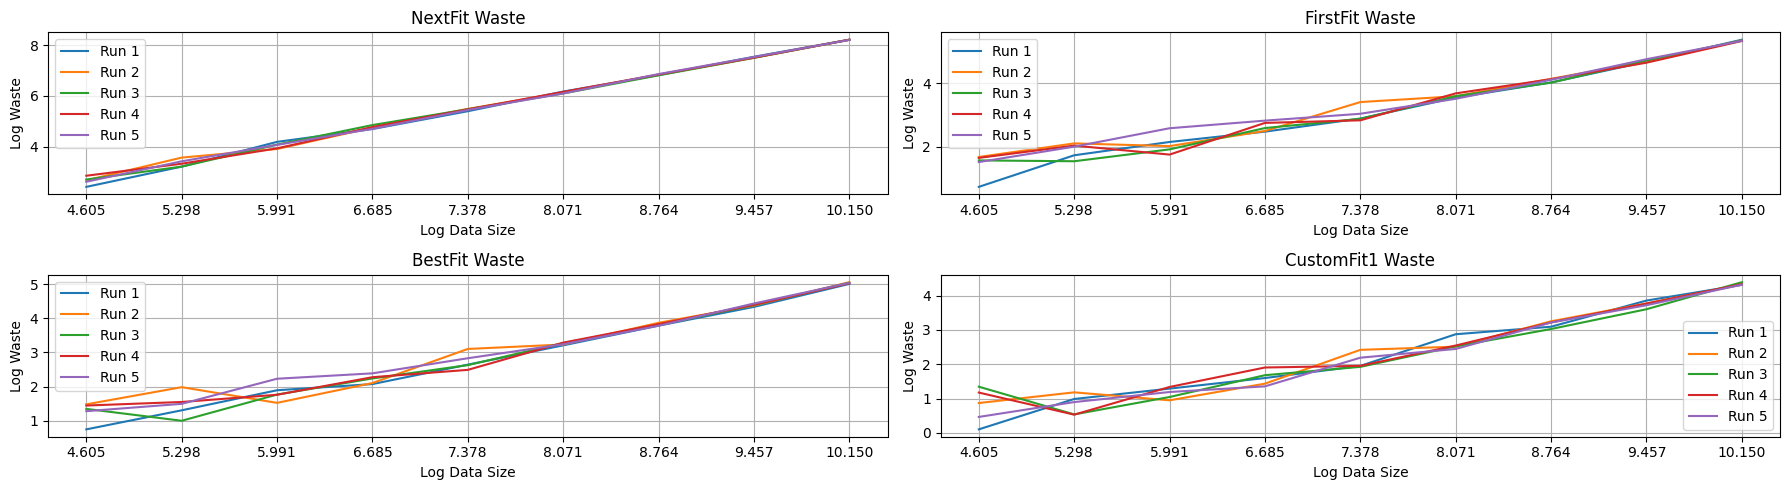

In [219]:
fig, axes = plt.subplots(2, 2, figsize=(18, 5))
plottype(cf1, 'NextFit', 'Waste', axes[0,0])
plottype(cf1, 'FirstFit', 'Waste', axes[0,1])
plottype(cf1, 'BestFit', 'Waste', axes[1,0])
plottype(cf1, 'CustomFit1', 'Waste', axes[1,1])
plt.tight_layout()
plt.show()

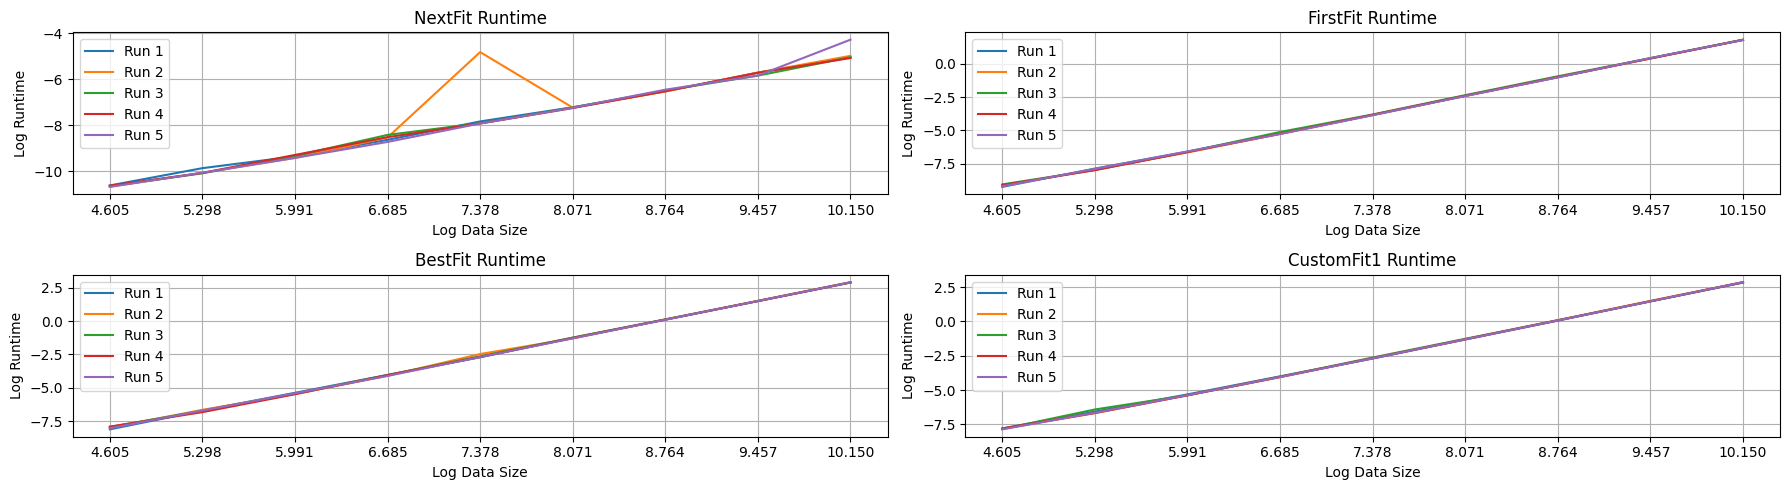

In [220]:
fig, axes = plt.subplots(2, 2, figsize=(18, 5))
plottype(cf1, 'NextFit', 'Runtime', axes[0,0])
plottype(cf1, 'FirstFit', 'Runtime', axes[0,1])
plottype(cf1, 'BestFit', 'Runtime', axes[1,0])
plottype(cf1, 'CustomFit1', 'Runtime', axes[1,1])
plt.tight_layout()
plt.show()

In [223]:
data_sizes = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600])
nf_waste = np.asarray(nf_results['NF Mean Waste'])
ff_waste = np.asarray(ff_results['FF Mean Waste'])
bf_waste = np.asarray(bf_results['BF Mean Waste'])
cf1_waste = np.asarray(cf1_results['CF1 Mean Waste'])

log_data_sizes = np.log(data_sizes)
log_nf_waste = np.log(nf_waste)
log_ff_waste = np.log(ff_waste)
log_bf_waste = np.log(bf_waste)
log_cf1_waste = np.log(cf1_waste)
X = sm.add_constant(log_data_sizes)

model_nf = sm.OLS(log_nf_waste, X).fit()
model_ff = sm.OLS(log_ff_waste, X).fit()
model_bf = sm.OLS(log_bf_waste, X).fit()
model_cf1 = sm.OLS(log_cf1_waste, X).fit()

print('Waste Coefficients')
print("Coefficients for NF:", model_nf.params)
print("Coefficients for NF:", model_ff.params)
print("Coefficients for NF:", model_bf.params)
print("Coefficients for CF1:", model_cf1.params)

Waste Coefficients
Coefficients for NF: [-1.96037819  1.00280427]
Coefficients for NF: [-1.86602971  0.68846979]
Coefficients for NF: [-2.1561605  0.685797 ]
Coefficients for CF1: [-2.58959906  0.65936712]


In [224]:
nf_time=np.asarray(nf_results['NF Mean Runtime'])
ff_time=np.asarray(ff_results['FF Mean Runtime'])
bf_time=np.asarray(bf_results['BF Mean Runtime'])
cf1_time=np.asarray(cf1_results['CF1 Mean Runtime'])

log_nf_time=np.log(nf_time)
log_ff_time=np.log(ff_time)
log_bf_time=np.log(bf_time)
log_cf1_time=np.log(cf1_time)

model_nf_time=sm.OLS(log_nf_time, X).fit()
model_ff_time=sm.OLS(log_ff_time, X).fit()
model_bf_time=sm.OLS(log_bf_time, X).fit()
model_cf1_time=sm.OLS(log_cf1_time, X).fit()

print('Runtime Coefficients')
print("Coefficients for NF:", model_nf_time.params)
print("Coefficients for FF:", model_ff_time.params)
print("Coefficients for BF:", model_bf_time.params)
print("Coefficients for CF1:", model_cf1_time.params)

Runtime Coefficients
Coefficients for NF: [-15.31477408   1.03461213]
Coefficients for FF: [-18.40470293   1.98383937]
Coefficients for BF: [-17.14878641   1.96922462]
Coefficients for CF1: [-16.87287764   1.93488284]


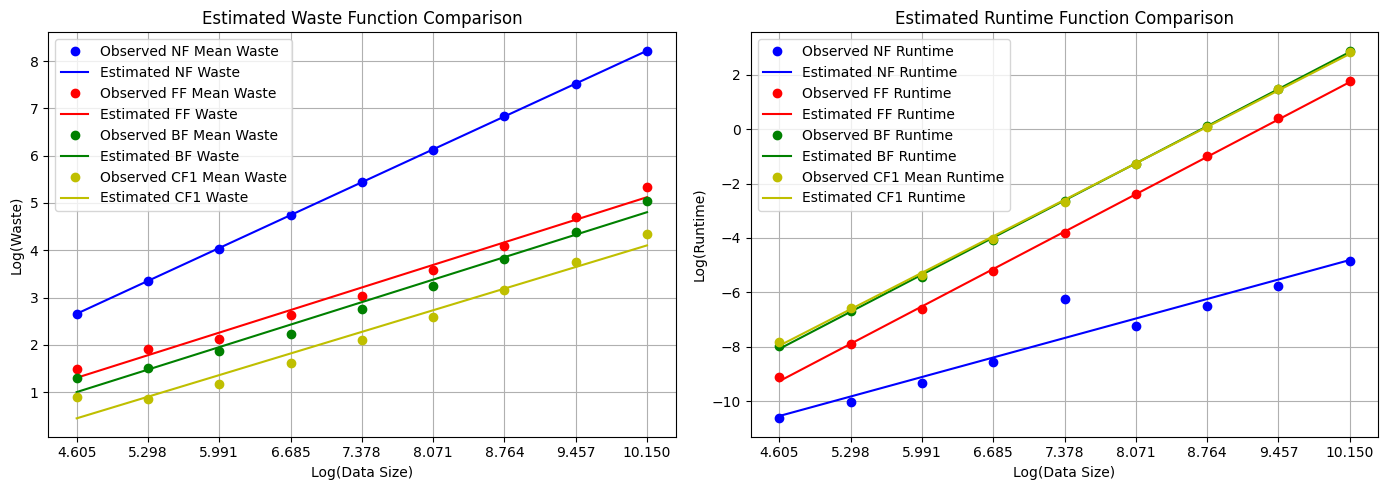

In [227]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(log_data_sizes, log_nf_waste, 'bo', label = 'Observed NF Mean Waste')
axes[0].plot(log_data_sizes, model_nf.fittedvalues, 'b-', label = 'Estimated NF Waste')
axes[0].plot(log_data_sizes, log_ff_waste, 'ro', label = 'Observed FF Mean Waste')
axes[0].plot(log_data_sizes, model_ff.fittedvalues, 'r-', label = 'Estimated FF Waste')
axes[0].plot(log_data_sizes, log_bf_waste, 'go', label = 'Observed BF Mean Waste')
axes[0].plot(log_data_sizes, model_bf.fittedvalues, 'g-', label = 'Estimated BF Waste')
axes[0].plot(log_data_sizes, log_cf1_waste, 'yo', label = 'Observed CF1 Mean Waste')
axes[0].plot(log_data_sizes, model_cf1.fittedvalues, 'y-', label = 'Estimated CF1 Waste')
axes[0].set_xlabel('Log(Data Size)')
axes[0].set_ylabel('Log(Waste)')
axes[0].set_xticks(log_data_sizes)
axes[0].legend()
axes[0].set_title('Estimated Waste Function Comparison')
axes[0].grid()

axes[1].plot(log_data_sizes, log_nf_time, 'bo', label = 'Observed NF Runtime')
axes[1].plot(log_data_sizes, model_nf_time.fittedvalues, 'b-', label = 'Estimated NF Runtime')
axes[1].plot(log_data_sizes, log_ff_time, 'ro', label = 'Observed FF Runtime')
axes[1].plot(log_data_sizes, model_ff_time.fittedvalues, 'r-', label = 'Estimated FF Runtime')
axes[1].plot(log_data_sizes, log_bf_time, 'go', label = 'Observed BF Runtime')
axes[1].plot(log_data_sizes, model_bf_time.fittedvalues, 'g-', label = 'Estimated BF Runtime')
axes[1].plot(log_data_sizes, log_cf1_time, 'yo', label = 'Observed CF1 Mean Runtime')
axes[1].plot(log_data_sizes, model_cf1_time.fittedvalues, 'y-', label = 'Estimated CF1 Runtime')
axes[1].set_xlabel('Log(Data Size)')
axes[1].set_ylabel('Log(Runtime)')
axes[1].set_xticks(log_data_sizes)
axes[1].legend()
axes[1].set_title('Estimated Runtime Function Comparison')
axes[1].grid()

plt.tight_layout()
plt.show()

**NextFit(NF) Estimated Waste Function of n**: 
- $Log(NFWaste) = -1.9604 + 1.0028 log(n)$
- OR exponentiated: $NFWaste = 0.140 n^{1.0028}$

**FirstFit(FF) Estimated Waste Function of n**: 
- $Log(FFWaste) = -1.866 + 0.6884 log(n)$
- OR exponentiated: $FFWaste = 0.154 n^{0.6884}$

**BestFit(BF) Estimated Waste Function of n**: 
- $Log(BFWaste) = -2.156 + 0.6858 log(n)$
- OR exponentiated: $BFWaste = 0.115 n^{0.6858}$

**CustomFit1(CF1) Estimated Waste Function of n**:
- $Log(CF1Waste) = -2.589 + 0.6593 log(n)$
- OR exponentiated: $CF1Waste = 0.075 n^{0.6593}$


**NF Estimated Big-O**:
- $O(n)$

**FF Sorted Big-O**:
- $O(n^{2})$

**BF Sorted Big-O**:
- $O(n^{2})$

**CF1 Estimated Big-O**:
- $O(n^{ 1.934}) \approx O(n^{2})$


#### How CustomFit1 compared to NextFit, FirstFit, and BestFit in waste and runtime:

As shown above, I used statsmodels package to run linear regressions on the observed mean wastes and runtimes from NextFit, FirstFit, BestFit, and CustomFit1, thus allowing me to get accurate coefficients for the estimated functions of waste and runtime. Each equation has a negative intercept term, and a positive slope coefficient. Analyzing the log(waste) equations from above, we can see that NextFit has the largest slope of 1.0028, FirstFit has a smaller slope coefficient of 0.6884, BestFit has around the same size coefficient of 0.6858, and CustomFit1 having the smallest slope of them all at 0.6593. This directly indicates the improved performance in regard to waste as you go down the list. Sorting had a lot to do with the improvement in waste over NF, FF, and BF. I previously ran this CustomFit1 algorithm without sorting and in regard to waste, it performed just about as good as first fit. For the sake of improving all three of these, I decided to use MergeSort to reverse sort, and sure enough that did the trick. The plot above shows the performance of the four matched up next to each other: NF performing worst, FF next, BF close to FF, and CF1 performing the best. This is what I expected the results to look like once I decided to use sorting.

Looking at average run times across these four bin packing algorithms, I notice that runtimes are inversely correlated with waste performance. The plot off to the right above illustrates the average runtimes across data sizes for each of the four algorithms being compared. NextFit performed lightning quick on all data sizes only taking fractions of a second but noticably there was a large spike in runtime at the 1600 data size and this may have been due to the distribution of the randomly generated data. FirstFit was somewhere in the middle ground running on decent time while also performing well waste wise. BestFit and CustomFit1 performed much slower in comparison to NextFit, especially in the larger data sizes, and it ran somewhat slower than FirstFit. On smaller data sizes, CF1 had runtimes somewhat comparable to NextFit's, but as data got larger, its runtime slowed considerably: taking around 17 seconds on the 25600 data size. Even with sorting, CF1 ran faster than BestFit on many of the data sizes, especially the larger ones.

## CustomFit2 VS NextFit, FirstFit, BestFit
(Aaron)
#### Motivation
For CustomFit2, we did a group based binpacking using BestFit as our algorithm of choice. We first group the items in the list based on deterministic ranges and use BestFit on the grouped list. This a pseudo sort algorithm as it is similar to sorting. It groups items in ranges and the ranges are in descending order. This improves on BestFit, FirstFit, and NextFit.

#### Functionality and Explanation
Our binpacking algorithm utilizes grouping of similar range items. The function is given a pre-determined number of groups and the data in list form, and groups them in n groups. Each group is evenly split. In our implementation we use 5 groups. The groups are in order, with the largest group at the front of the list, and descending down. But the items in each group are not sorted. We then do binpacking on this grouped data rather than random data. Our binpacking algorithm of choise is BestFit. This improves on waste because there is a structure to the data.

Bellow are summary statistics of our CustomFit2 compared to NextFit, FirstFit, and BestFit.

### Descriptive Statistics

In [59]:
cf2 = pd.read_csv("cf2_results.csv")
cf2['Algorithm'] = cf2['Algos'].apply(format_string)
cf2 = cf2.drop('Algos', axis=1)

In [60]:
# Stats on CustomFit2 vs nf,ff,bf
nf_results = cf2[cf2['Algorithm'].str.contains('NextFit0|NextFit1|NextFit2|NextFit3|NextFit4')]
nf_results = nf_results.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
nf_results = nf_results.rename(columns={'Waste':'NF Mean Waste', 'Runtime':'NF Mean Runtime'})

bf_results = cf2[cf2['Algorithm'].str.contains('BestFit0|BestFit1|BestFit2|BestFit3|BestFit4')]
bf_results = bf_results.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
bf_results = bf_results.rename(columns={'Waste':'BF Mean Waste', 'Runtime':'BF Mean Runtime'})

ff_results = cf2[cf2['Algorithm'].str.contains('FirstFit0|FirstFit1|FirstFit2|FirstFit3|FirstFit4')]
ff_results = ff_results.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
ff_results = ff_results.rename(columns={'Waste':'FF Mean Waste', 'Runtime':'FF Mean Runtime'})

cf2_results = cf2[cf2['Algorithm'].str.contains('CustomFit20|CustomFit21|CustomFit22|CustomFit23|CustomFit24')]
cf2_results = cf2_results.groupby(['Data Size']).agg({'Waste':'mean', 'Runtime':'mean'})
cf2_results = cf2_results.rename(columns={'Waste':'CF2 Mean Waste', 'Runtime':'CF2 Mean Runtime'})

merged_stats = nf_results.merge(cf2_results, on = 'Data Size').merge(bf_results, on='Data Size').merge(ff_results, on='Data Size')
merged_stats = merged_stats[['NF Mean Waste', 'FF Mean Waste','BF Mean Waste','CF2 Mean Waste', 'NF Mean Runtime', 'FF Mean Runtime','BF Mean Runtime','CF2 Mean Runtime']]
pd.set_option('display.width', 1000)
print(merged_stats)

           NF Mean Waste  FF Mean Waste  BF Mean Waste  CF2 Mean Waste  NF Mean Runtime  FF Mean Runtime  BF Mean Runtime  CF2 Mean Runtime
Data Size                                                                                                                                  
100            14.229911       4.429911       3.629911        2.629911         0.000046         0.000127         0.000577          0.000633
200            28.558679       6.758679       4.558679        2.758679         0.000060         0.000390         0.001717          0.002146
400            56.627807       8.427807       6.427807        1.827807         0.000118         0.001304         0.006838          0.011361
800           115.816490      14.016490       9.216490        1.816490         0.000211         0.005561         0.031300          0.036346
1600          233.217887      20.817887      15.817887        2.417887         0.000483         0.020333         0.083504          0.119639
3200          458.74

#### Plotting Waste and Runtime on Log-Log Scale

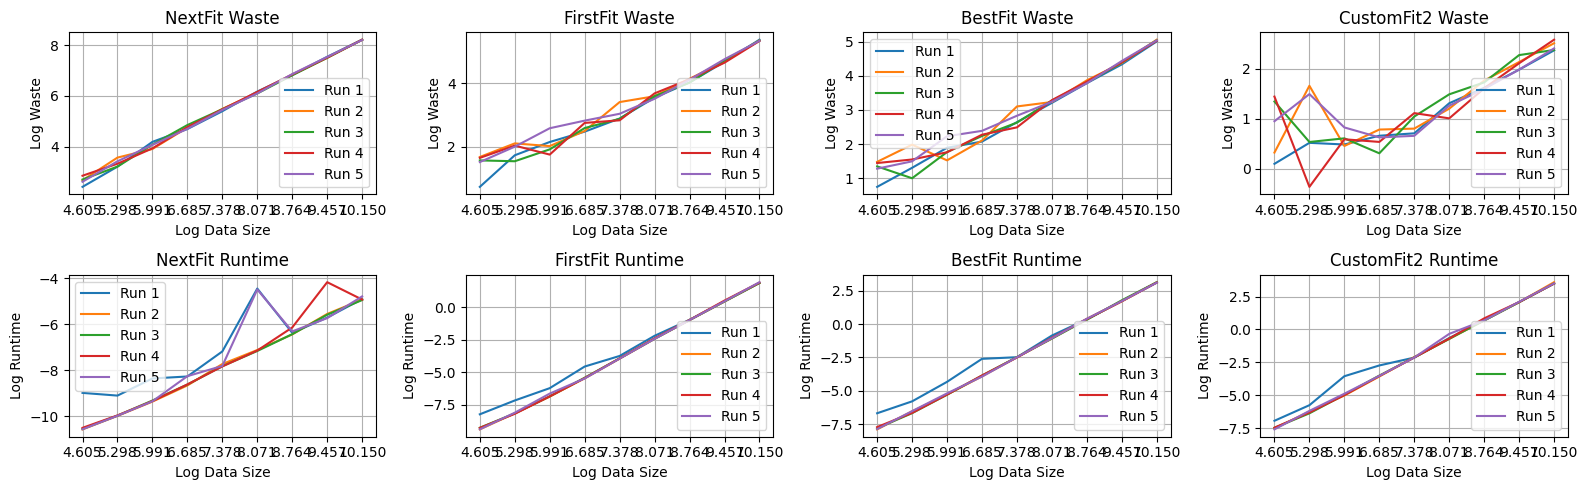

In [33]:
fig, axes = plt.subplots(2, 4, figsize=(16, 5))
plottype(cf2, 'NextFit', 'Waste', axes[0,0])
plottype(cf2, 'FirstFit','Waste', axes[0,1])
plottype(cf2, 'BestFit', 'Waste', axes[0,2])
plottype(cf2, 'CustomFit2', 'Waste', axes[0,3])
plottype(cf2, 'NextFit', 'Runtime', axes[1,0])
plottype(cf2, 'FirstFit','Runtime', axes[1,1])
plottype(cf2, 'BestFit', 'Runtime', axes[1,2])
plottype(cf2, 'CustomFit2', 'Runtime', axes[1,3])
plt.tight_layout()
plt.show()

In [34]:
# Can use same X and data size array as above

bf_waste=np.asarray(bf_results['BF Mean Waste'])
ff_waste=np.asarray(ff_results['FF Mean Waste'])
nf_waste=np.asarray(nf_results['NF Mean Waste'])
cf2_waste=np.asarray(cf2_results['CF2 Mean Waste'])


log_bf_waste=np.log(bf_waste)
log_ff_waste=np.log(ff_waste)
log_nf_waste = np.log(nf_waste)
log_cf2_waste = np.log(cf2_waste)

model_nf = sm.OLS(log_nf_waste, X).fit()
model_cf2 = sm.OLS(log_cf2_waste, X).fit()
model_bf = sm.OLS(log_bf_waste, X).fit()
model_ff = sm.OLS(log_ff_waste, X).fit()

print('Waste Coefficients')
print("Coefficients for NF:", model_nf.params)
print("Coefficients for BF Sorted:", model_bf.params)
print("Coefficients for FF Sorted:", model_ff.params)
print("Coefficients for CF2:", model_cf2.params)

Waste Coefficients
Coefficients for NF: [-1.96037819  1.00280427]
Coefficients for BF Sorted: [-2.1561605  0.685797 ]
Coefficients for FF Sorted: [-1.86602971  0.68846979]
Coefficients for CF2: [-0.84324282  0.28820274]


In [35]:
bf_time=np.asarray(bf_results['BF Mean Runtime'])
nf_time=np.asarray(nf_results['NF Mean Runtime'])
ff_time=np.asarray(ff_results['FF Mean Runtime'])
cf2_time=np.asarray(cf2_results['CF2 Mean Runtime'])

log_bf_time=np.log(bf_time)
log_nf_time=np.log(nf_time)
log_ff_time=np.log(ff_time)
log_cf2_time=np.log(cf2_time)

model_nf_time = sm.OLS(log_nf_time, X).fit()
model_cf2_time = sm.OLS(log_cf2_time, X).fit()
model_bf_time = sm.OLS(log_bf_time, X).fit()
model_ff_time = sm.OLS(log_ff_time, X).fit()

print('Runtime Coefficients')
print("Coefficients for NF:", model_nf_time.params)
print("Coefficients for BF Sorted:", model_bf_time.params)
print("Coefficients for FF Sorted:", model_ff_time.params)
print("Coefficients for CF2:", model_cf2_time.params)

Runtime Coefficients
Coefficients for NF: [-14.97188987   1.02820473]
Coefficients for BF Sorted: [-16.43248627   1.91776347]
Coefficients for FF Sorted: [-18.34756335   1.98087897]
Coefficients for CF2: [-16.38945554   1.95463351]


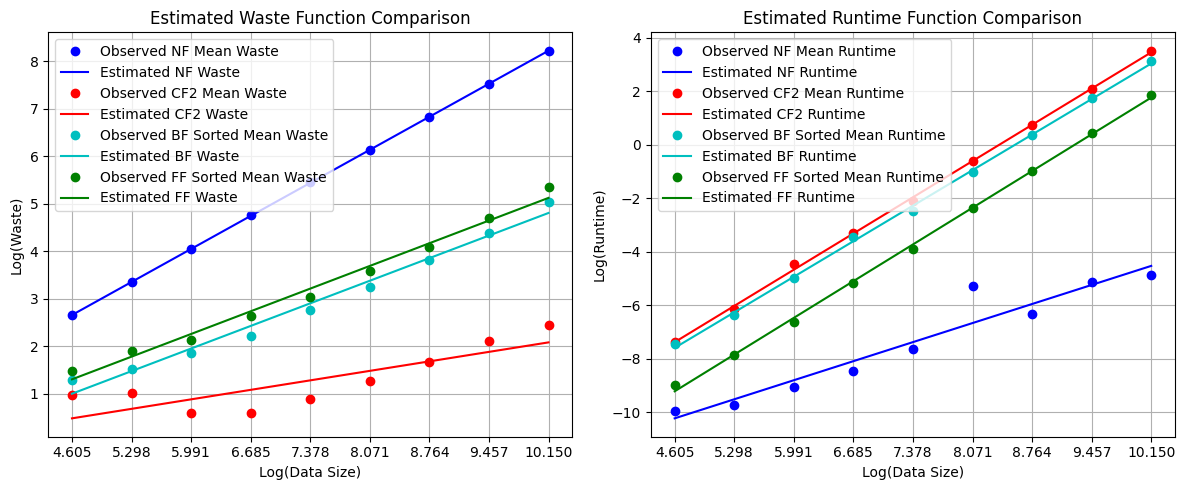

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# axes[0,1].figure(figsize=(8, 5))
axes[0].plot(log_data_sizes, log_nf_waste, 'bo', label = 'Observed NF Mean Waste')
axes[0].plot(log_data_sizes, model_nf.fittedvalues, 'b-', label = 'Estimated NF Waste')

axes[0].plot(log_data_sizes, log_cf2_waste, 'ro', label = 'Observed CF2 Mean Waste')
axes[0].plot(log_data_sizes, model_cf2.fittedvalues, 'r-', label = 'Estimated CF2 Waste')

axes[0].plot(log_data_sizes, log_bf_waste, 'co', label = 'Observed BF Sorted Mean Waste')
axes[0].plot(log_data_sizes, model_bf.fittedvalues, 'c-', label = 'Estimated BF Waste')

axes[0].plot(log_data_sizes, log_ff_waste, 'go', label = 'Observed FF Sorted Mean Waste')
axes[0].plot(log_data_sizes, model_ff.fittedvalues, 'g-', label = 'Estimated FF Waste')

axes[0].set_xlabel('Log(Data Size)')
axes[0].set_ylabel('Log(Waste)')
axes[0].set_xticks(log_data_sizes)
axes[0].legend()
axes[0].set_title('Estimated Waste Function Comparison')
axes[0].grid()

########
axes[1].plot(log_data_sizes, log_nf_time, 'bo', label = 'Observed NF Mean Runtime')
axes[1].plot(log_data_sizes, model_nf_time.fittedvalues, 'b-', label = 'Estimated NF Runtime')

axes[1].plot(log_data_sizes, log_cf2_time, 'ro', label = 'Observed CF2 Mean Runtime')
axes[1].plot(log_data_sizes, model_cf2_time.fittedvalues, 'r-', label = 'Estimated CF2 Runtime')

axes[1].plot(log_data_sizes, log_bf_time, 'co', label = 'Observed BF Sorted Mean Runtime')
axes[1].plot(log_data_sizes, model_bf_time.fittedvalues, 'c-', label = 'Estimated BF Runtime')

axes[1].plot(log_data_sizes, log_ff_time, 'go', label = 'Observed FF Sorted Mean Runtime')
axes[1].plot(log_data_sizes, model_ff_time.fittedvalues, 'g-', label = 'Estimated FF Runtime')

axes[1].set_xlabel('Log(Data Size)')
axes[1].set_ylabel('Log(Runtime)')
axes[1].set_xticks(log_data_sizes)
axes[1].legend()
axes[1].set_title('Estimated Runtime Function Comparison')
axes[1].grid()

plt.tight_layout()
plt.show()

**NextFit(NF) Estimated Waste Function of n**: 
- $Log(NFWaste) = -1.9604 + 1.0028 log(n)$
- OR exponentiated: $NFWaste = 0.140 n^{1.0028}$

**FirstFit(FF) Estimated Waste Function of n**:
- $Log(FFWaste) = -1.8660 + 0.6884 log(n)$
- OR exponentiated: $NFWaste = 0.154 n^{0.6884}$

**BestFit(BF) Estimated Waste Function of n**:
- $Log(BFWaste) = -2.1561 + 0.6857 log(n)$
- OR exponentiated: $BFWaste = 0.115 n^{0.6857}$

**CustomFit2(CF2) Estimated Waste Function of n**:
- $Log(CF2Waste) = -0.8432 + 0.2882 log(n)$
- Or exponentiated: $0.430  n^{0.2882}$

**NF Estimated Big-O**:
- $O(n)$

**FF Sorted Big-O**:
- $O(n^{2})$

**BF Sorted Big-O**:
- $O(n^{2})$

**CF2 Estimated Big-O**:
- $O(n^{1.954}) \approx O(n^{2})$

#### How CustomFit2 compared to NextFit, FirstFit, and BestFit in waste and runtime:

CustomFit2 performs much better in terms of waste compared to the rest of the binpacking algorithms. This can be seen with the mean waste across data sizes. When n=25600, the other algorithms are in the hundreds and NextFit thousands, but CF2 is still only at approximately 11. This is because it is similar to a sorting algorithm, but rather than sort, it groups items with similar sizes. This can also be seen in the slope coefficients in each fitted model. The smaller slope means that waste grows slower as n increases, and CF2 has a slope of 0.288, while FF and BF are approximately 0.68 and NF is approximately 1.

While CF2 performs better, is also takes longer to run. Although by estimating the runtime big-O, CF2, BF, and FF are all $\approx O(n^{2})$, if we look at the experiments, CF2 is in fact the slowest. At small n, they are similar. But CF2 starts to differentiate itself at n=25600 with a runtime of 33.53 seconds. Meanwhile FF hovers around 6 seconds and BF around 22. Since the binpacking algorithm used within CF2 is BestFit, it is most competitive with BestFit in terms of runtime.